## Preparing tweets for model - stopwords, tokenize, 3 columns only

In [2]:
import pandas as pd

In [3]:
tweets = pd.read_csv('Data/CleanedTweets/engtweets.csv')

In [4]:
import nltk
import spacy
import string

In [5]:
from nltk.probability import FreqDist
from nltk.corpus      import stopwords
from nltk.tokenize    import sent_tokenize, word_tokenize
from nltk.stem        import PorterStemmer, WordNetLemmatizer

In [6]:
import matplotlib.pyplot as plt

In [24]:
from wordcloud  import WordCloud

In [7]:
sw_list  = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', '©', '27', '1', "'ve",'-', '–', '—', "n't", 
            'https', '2', "'re", "'m'", '3', '..', 'ca', "'s", 'amp', 'coronavirus', 'covid-19', 'covid19', 'covid']

In [8]:
tweets

,id,conversation_id,created_at,date,time,user_id,username,tweet,mentions,urls,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,reply_to
0,1382483803554385925,1382472677206687746,2021-04-14 18:59:58 CDT,2021-04-14,18:59:58,503541916,johnmaddox,@rosensteindave @Dollarlogic It's like modern ...,[],[],1,0,0,[],[],https://twitter.com/johnmaddox/status/13824838...,False,NaN,0,"[{'screen_name': 'rosensteindave', 'name': 'Da..."
1,1382483797090971648,1382483797090971648,2021-04-14 18:59:57 CDT,2021-04-14,18:59:57,23262553,onomojo,I went to get my Covid test today but the plac...,[],[],0,0,0,[],[],https://twitter.com/onomojo/status/13824837970...,False,NaN,0,[]
2,1382483794423394308,1382428746846773251,2021-04-14 18:59:56 CDT,2021-04-14,18:59:56,1070420203450830849,anonloomom,@Iroserebel @ILYM333 Sounds like that are suin...,[],[],0,1,5,[],[],https://twitter.com/AnonLoomom/status/13824837...,False,NaN,0,"[{'screen_name': 'Iroserebel', 'name': 'Sheree..."
3,1382483794150629378,1382483794150629378,2021-04-14 18:59:56 CDT,2021-04-14,18:59:56,854678217633878017,josepuliampatta,Blocking middle seats on planes reduces risk o...,"[{'screen_name': 'yahoo', 'name': 'yahoo', 'id...",['https://www.yahoo.com/lifestyle/blocking-mid...,0,0,0,[],[],https://twitter.com/JosePuliampatta/status/138...,False,NaN,0,[]
4,1382483790283501569,1382483790283501569,2021-04-14 18:59:55 CDT,2021-04-14,18:59:55,62880287,elcentro72,We’re proud to receive support from @AllInWA20...,"[{'screen_name': 'allinwa2020', 'name': 'all i...",['https://allinwa.org/vei-grants-1/'],0,1,3,"['covid19', 'allinwa']",[],https://twitter.com/elcentro72/status/13824837...,False,NaN,0,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7633,1437929143954391045,1437929143954391045,2021-09-14 18:59:58 CDT,2021-09-14,18:59:58,1392622121109508097,chummymybunny,@Khairykj @KKMPutrajaya @IsmailSabri60 @saif...,"[{'screen_name': 'kkmputrajaya', 'name': 'kkma...",[],0,7,12,['loveisnottourismmy'],[],https://twitter.com/chummymybunny/status/14379...,False,NaN,0,[]
7634,1437929140410327043,1437807594219917327,2021-09-14 18:59:57 CDT,2021-09-14,18:59:57,28057765,therealallpro,@JJR3Esq @omw @aldotcom The economist just rep...,[],[],0,0,0,[],[],https://twitter.com/therealallpro/status/14379...,False,NaN,0,"[{'screen_name': 'JJR3Esq', 'name': 'jr', 'id'..."
7635,1437929139420295175,1437800684481654789,2021-09-14 18:59:56 CDT,2021-09-14,18:59:56,525066895,davidlloyd09,@LizSzabo See ya later. They owe it to the ICU...,[],[],1,0,0,[],[],https://twitter.com/Davidlloyd09/status/143792...,False,NaN,0,"[{'screen_name': 'LizSzabo', 'name': 'Liz Szab..."
7636,1437929138552287233,1437929138552287233,2021-09-14 18:59:56 CDT,2021-09-14,18:59:56,890685189093027840,jmatt426tx,Shouldn't be surprised: look who they elect to...,[],[],0,0,0,['moscowmitch'],[],https://twitter.com/jmatt426tx/status/14379291...,False,https://twitter.com/brontyman/status/143790264...,0,[]


In [9]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7638 entries, 0 to 7637
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               7638 non-null   int64 
 1   conversation_id  7638 non-null   int64 
 2   created_at       7638 non-null   object
 3   date             7638 non-null   object
 4   time             7638 non-null   object
 5   user_id          7638 non-null   int64 
 6   username         7638 non-null   object
 7   tweet            7638 non-null   object
 8   mentions         7638 non-null   object
 9   urls             7638 non-null   object
 10  replies_count    7638 non-null   int64 
 11  retweets_count   7638 non-null   int64 
 12  likes_count      7638 non-null   int64 
 13  hashtags         7638 non-null   object
 14  cashtags         7638 non-null   object
 15  link             7638 non-null   object
 16  retweet          7638 non-null   bool  
 17  quote_url        729 non-null    

In [10]:
tweets.retweet.value_counts()

False    7638
Name: retweet, dtype: int64

In [11]:
data = tweets[['date', 'username', 'tweet']].copy()

In [12]:
data

,date,username,tweet
0,2021-04-14,johnmaddox,@rosensteindave @Dollarlogic It's like modern ...
1,2021-04-14,onomojo,I went to get my Covid test today but the plac...
2,2021-04-14,anonloomom,@Iroserebel @ILYM333 Sounds like that are suin...
3,2021-04-14,josepuliampatta,Blocking middle seats on planes reduces risk o...
4,2021-04-14,elcentro72,We’re proud to receive support from @AllInWA20...
...,...,...,...
7633,2021-09-14,chummymybunny,@Khairykj @KKMPutrajaya @IsmailSabri60 @saif...
7634,2021-09-14,therealallpro,@JJR3Esq @omw @aldotcom The economist just rep...
7635,2021-09-14,davidlloyd09,@LizSzabo See ya later. They owe it to the ICU...
7636,2021-09-14,jmatt426tx,Shouldn't be surprised: look who they elect to...


In [13]:
def process_tweet(tweet):
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_list]
    return stopwords_removed    

In [14]:
data['clean_tweets'] = data.tweet.map(process_tweet)

In [15]:
data

,date,username,tweet,clean_tweets
0,2021-04-14,johnmaddox,@rosensteindave @Dollarlogic It's like modern ...,"[rosensteindave, dollarlogic, like, modern, id..."
1,2021-04-14,onomojo,I went to get my Covid test today but the plac...,"[went, get, test, today, place, power, got, go..."
2,2021-04-14,anonloomom,@Iroserebel @ILYM333 Sounds like that are suin...,"[iroserebel, ilym333, sounds, like, suing, cdc..."
3,2021-04-14,josepuliampatta,Blocking middle seats on planes reduces risk o...,"[blocking, middle, seats, planes, reduces, ris..."
4,2021-04-14,elcentro72,We’re proud to receive support from @AllInWA20...,"[proud, receive, support, allinwa2020, help, f..."
...,...,...,...,...
7633,2021-09-14,chummymybunny,@Khairykj @KKMPutrajaya @IsmailSabri60 @saif...,"[khairykj, kkmputrajaya, ismailsabri60, saifud..."
7634,2021-09-14,therealallpro,@JJR3Esq @omw @aldotcom The economist just rep...,"[jjr3esq, omw, aldotcom, economist, reported, ..."
7635,2021-09-14,davidlloyd09,@LizSzabo See ya later. They owe it to the ICU...,"[lizszabo, see, ya, later, owe, icu, nurses, b..."
7636,2021-09-14,jmatt426tx,Shouldn't be surprised: look who they elect to...,"[surprised, look, elect, senate, moscowmitch, ..."


In [16]:
all_words = []

def vocab(clean):
    for word in clean:
        all_words.append(word)
            
data.clean_tweets.map(vocab)

0       None
1       None
2       None
3       None
4       None
        ... 
7633    None
7634    None
7635    None
7636    None
7637    None
Name: clean_tweets, Length: 7638, dtype: object

In [17]:
all_words

['rosensteindave',
 'dollarlogic',
 'like',
 'modern',
 'idiots',
 'put',
 'things',
 'actual',
 'context',
 'equate',
 'polio',
 'seriously',
 'went',
 'get',
 'test',
 'today',
 'place',
 'power',
 'got',
 'go',
 'back',
 'tomorrow',
 'another',
 '24',
 'hours',
 'anxiety',
 'thinking',
 'going',
 'shove',
 'thing',
 'brain',
 'iroserebel',
 'ilym333',
 'sounds',
 'like',
 'suing',
 'cdc',
 'fraud',
 'passing',
 'influenza',
 'thanks',
 'sharing',
 '....',
 'could',
 'huge',
 '♥️',
 'blocking',
 'middle',
 'seats',
 'planes',
 'reduces',
 'risk',
 'transmission',
 'cdc',
 'study',
 'says',
 '//t.co/c5mid2j05c',
 'via',
 'yahoo',
 'proud',
 'receive',
 'support',
 'allinwa2020',
 'help',
 'funds',
 'help',
 'reduce',
 'barriers',
 'vaccine',
 'access',
 'communities',
 'disproportionately',
 'impacted',
 'allinwa',
 '//t.co/g5onlnusg8',
 'board',
 'exam',
 'class',
 '10th',
 '12th',
 'ka',
 'exam',
 'cancel',
 'hona',
 'chahiye',
 'kyoki',
 'bachhe',
 'infected',
 'ho',
 'jayaenge',
 

In [18]:
len(all_words)

120630

In [19]:
all_words_set = set(all_words)
len(all_words_set)

22456

In [20]:
all_words_fqdist = FreqDist(all_words)
all_words_fqdist.most_common(200)

[('vaccine', 1116),
 ('people', 1044),
 ('get', 993),
 ('vaccinated', 642),
 ('like', 488),
 ('still', 430),
 ('one', 402),
 ('cases', 402),
 ('got', 385),
 ('getting', 385),
 ('new', 385),
 ('would', 377),
 ('deaths', 364),
 ('health', 359),
 ('know', 348),
 ('shot', 336),
 ('vaccines', 334),
 ('us', 334),
 ('pandemic', 301),
 ('booster', 296),
 ('even', 295),
 ('time', 290),
 ('many', 272),
 ('need', 268),
 ('also', 267),
 ('think', 246),
 ('year', 246),
 ('last', 238),
 ('going', 232),
 ('want', 231),
 ('hospital', 230),
 ('go', 227),
 ('vaccination', 212),
 ('since', 211),
 ('biden', 208),
 ('could', 207),
 ('take', 206),
 ('died', 203),
 ('patients', 203),
 ('state', 202),
 ('flu', 201),
 ('care', 201),
 ('back', 200),
 ('virus', 200),
 ('unvaccinated', 200),
 ('said', 197),
 ('death', 197),
 ('work', 194),
 ('test', 193),
 ('say', 191),
 ('via', 190),
 ('first', 188),
 ('well', 188),
 ('positive', 186),
 ('never', 186),
 ("'m", 185),
 ('today', 184),
 ('way', 179),
 ('die', 179),

In [21]:
top25_fqdist = all_words_fqdist.most_common(25)
fqdist = pd.DataFrame(top25_fqdist)

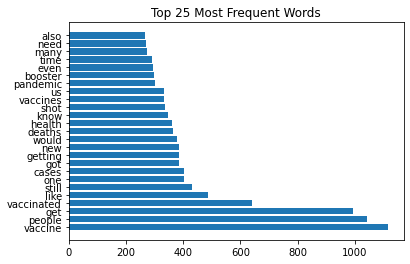

In [22]:
plt.barh(fqdist[0], fqdist[1])
plt.title('Top 25 Most Frequent Words')
#plt.savefig('most_freq_words.png')
plt.show()

## Word Cloud

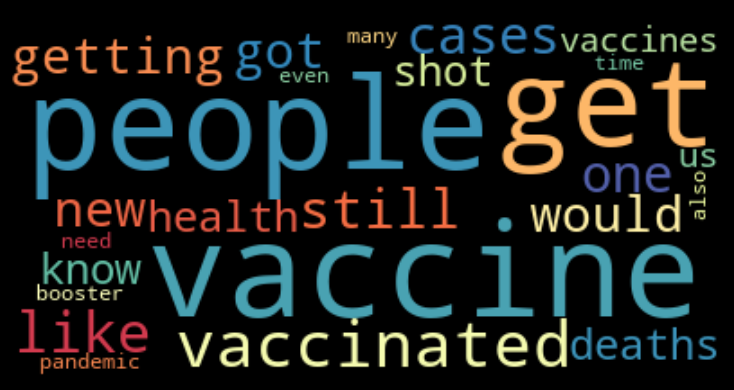

In [25]:
tweet_bar_words = [x[0] for x in top25_fqdist]
tweet_bar_counts = [x[1] for x in top25_fqdist]

tweet_dict = dict(zip(tweet_bar_words, tweet_bar_counts))

wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(tweet_dict)

plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Tweet Word Cloud')
plt.tight_layout(pad=0)

plt.savefig('tweet_wordcloud.png')

plt.show()